In [25]:
import platform
import os
import csv
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import xlrd  # Excel read

from pandas import DataFrame
from matplotlib import rc
from scipy import stats  # 통계 지원

rc('font', family='Malgun Gothic')
plt.rcParams["font.size"] = 12         # 글자 크기
plt.rcParams['axes.unicode_minus'] = False # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)

%matplotlib inline

### 1변량 데이터

In [26]:
fish = [i for i in range(6, 11)] # 6 ~ 10
print(fish)

[6, 7, 8, 9, 10]


In [27]:
# fish.describe() # X
# fishnd = np.array(fish)
# fishnd.describe() # X
df = DataFrame(fish)
df

,0
0,6
1,7
2,8
3,9
4,10


In [28]:
df = DataFrame({'fish': fish})
df

,fish
0,6
1,7
2,8
3,9
4,10


In [29]:
des = df.describe()
des

,fish
count,5.000
mean,8.000
std,1.581
min,6.000
25%,7.000
50%,8.000
75%,9.000
max,10.000


In [30]:
df.var()

fish    2.5
dtype: float64

In [31]:
ds = df.values
ds

array([[ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [32]:
ds = df['fish'].values
ds

array([ 6,  7,  8,  9, 10], dtype=int64)

In [33]:
# 총점
tot = ds.sum()
print(tot)
# 평균
avg = ds.mean()
print(avg)
# 편차의 합
print([v - avg for v in ds])
print(sum([v - avg for v in ds])) # 편차의 합은 0
dev = sum([(v - avg)**2 for v in ds])
print(dev) # 편차의 제곱의 합

40
8.0
[-2.0, -1.0, 0.0, 1.0, 2.0]
0.0
10.0


In [34]:
print(5/5, 5/4, 5/3, 5/2, 5/1)
print(5/5, 4/5, 3/5, 2/5, 1/5)

1.0 1.25 1.6666666666666667 2.5 5.0
1.0 0.8 0.6 0.4 0.2


In [35]:
# 분산
var = dev / len(ds)
print(var)  # 데이터의 총갯수로 나누었음으로 모집단의 분산(모분산) σ²
print(df.var())  # 데이터의 총갯수 - 1임으로 표본집단의 분산(표본분산) s²
print(dev / (len(ds)-1))

2.0
fish    2.5
dtype: float64
2.5


In [36]:
# 표준편차
print('표본 표준편차:', df.std()) # 표본 표준편차 s = √s²
print('모표준편차:', np.sqrt(var)) # 모표준편차 σ = √σ²
# 표준화: Z값 -> 표준정규분포표 -> 값의 범위가 0 ~ 1, 평균 0, 분산 1
#         -> 확률 규칙을 적용 가능(0 ~ 1) -> p-value(어떤 사건이 발생할 확률)

표본 표준편차: fish    1.581
dtype: float64
모표준편차: 1.4142135623730951


In [37]:
# 모집단: 우리회사에 응시한 신입사원, 특정 학교의 학생
# 표준화 z: (x - μ) / σ
print([(v - avg) / np.sqrt(var) for v in ds])

[-1.414213562373095, -0.7071067811865475, 0.0, 0.7071067811865475, 1.414213562373095]


In [38]:
des

,fish
count,5.000
mean,8.000
std,1.581
min,6.000
25%,7.000
50%,8.000
75%,9.000
max,10.000


In [39]:
print(des.loc['std', 'fish'])

1.5811388300841898


In [40]:
print(des.loc['25%', 'fish'])
print(stats.scoreatpercentile(fish, 30)) # 30 %, 오름차순 정렬 했을 경우 비율
print(stats.scoreatpercentile(fish, 40)) # 40 %
print(stats.scoreatpercentile(fish, 50)) # 50 %
print(stats.scoreatpercentile(fish, 75.5)) # 75.5 %

7.0
7.2
7.6
8.0
9.02


In [41]:
fish = np.append(fish, np.array([3, 3, 3, 4, 4]))
print(fish)

[ 6  7  8  9 10  3  3  3  4  4]


In [42]:
# fish 정렬
# fish = np.sort(fish)[::-1]
fish = np.sort(fish)
print(fish)

[ 3  3  3  4  4  6  7  8  9 10]


In [43]:
x = [v for v in range(1, len(fish)+1)]
print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


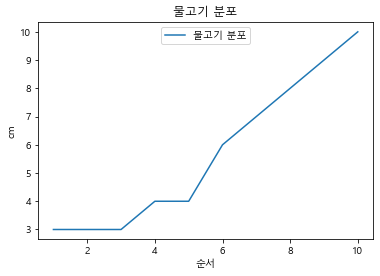

In [44]:
plt.plot(x, fish, label='물고기 분포')
plt.legend(loc='upper center')
plt.title('물고기 분포')
plt.xlabel('순서')
plt.ylabel('cm')
plt.show()

### 다변량 데이터

In [45]:
df = pd.read_csv('./data/scores.csv', index_col='stuno')
df

,english,math
stuno,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


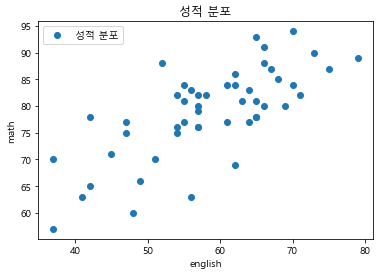

In [46]:
plt.scatter(df['english'], df['math'], label='성적 분포') # x, y
plt.legend(loc='upper left')
plt.title('성적 분포')
plt.xlabel('english')
plt.ylabel('math')
plt.show()

In [47]:
english = df['english']
math = df['math']
#print(math)

[35. 40. 45. 50. 55. 60. 65. 70. 75. 80.]
[55. 60. 65. 70. 75. 80. 85. 90. 95.]


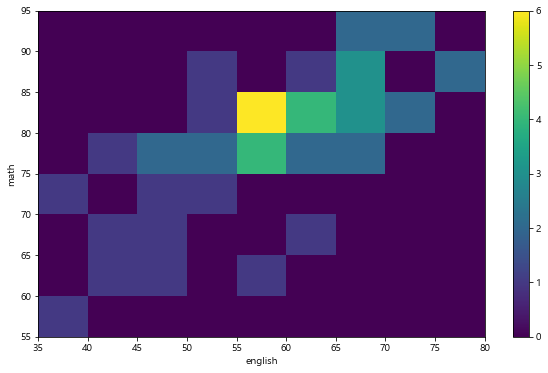

In [53]:
# 열그래프(Heat map): 구간에 등장하는 점수의 빈도

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111) # 1행 1열 첫번째

# bins=[x의 구간수, y의 구간수], range=[(x의 범위), (y의 범위)]
c = ax.hist2d(english, math,
              bins=[9, 8], range=[(35, 80), (55, 95)])
print(c[1])
print(c[2])
# print(c[3]) # <matplotlib.collections.QuadMesh object at 0x00000214A112F048>

ax.set_xlabel('english')
ax.set_ylabel('math')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3], ax=ax) # 컬러 바의 표시
plt.show()
# english: 55 ~ 60, math: 80 ~ 85점대의 분포가 가장 높음.

In [54]:
cdt = (english >= 55) & (english >= 60) &(math >= 80) & (math <= 85)
# print(cdt)
df[cdt]

,english,math
stuno,,
2,69,80
7,65,81
15,62,84
16,70,84
17,71,82
18,68,85
28,61,84
41,63,81
47,66,80


In [56]:
# npy 형식으로 저장된 NumPy array를 읽어들인다
anscombe_data = np.load('./data/anscombe.npy')
print(anscombe_data.shape)  # 4면 11행 2열
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [57]:
print(f'{1250.556:.2f}')

1250.56


In [58]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
                               'Y_variance', 'X&Y_correlation',
                               'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0] # 모든행의 첫번째 열
    dataY = data[:, 1] # 모든행의 두번째 열
    # 변수1(x), 변수2(y) , 차수(방정식의 차수): 1: 직선
    # 차수가 1이면 데이터를 직선에 맞춤, 차수가 2이면 곡선에 맞춤
    poly_fit = np.polyfit(dataX, dataY, 1) 
    print(poly_fit)
    stats_df[f'data{i+1}'] = \
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

[0.50009091 3.00009091]
[0.5        3.00090909]
[0.49972727 3.00245455]
[0.49990909 3.00172727]


,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


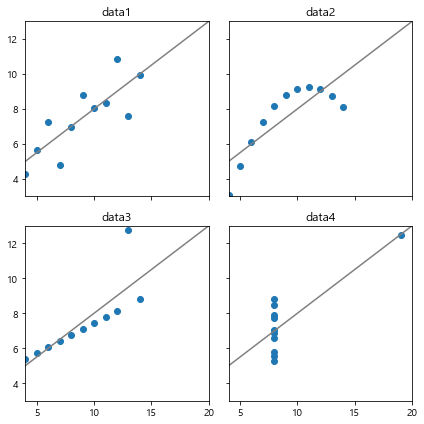

In [59]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6),
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # 타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

# 그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()